In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
data.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 17.5+ KB


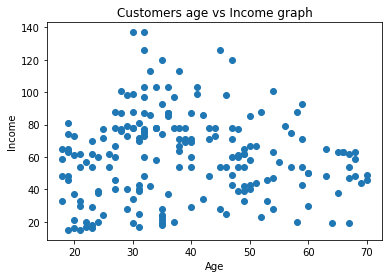

In [4]:
# Age vs Income graph
plt.scatter(data.Age,data.Income)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Customers age vs Income graph")
plt.show()

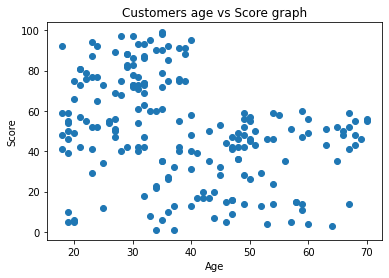

In [5]:
# Age vs Score graph
plt.scatter(data.Age,data.Score)
plt.xlabel("Age")
plt.ylabel("Score")
plt.title("Customers age vs Score graph")
plt.show()

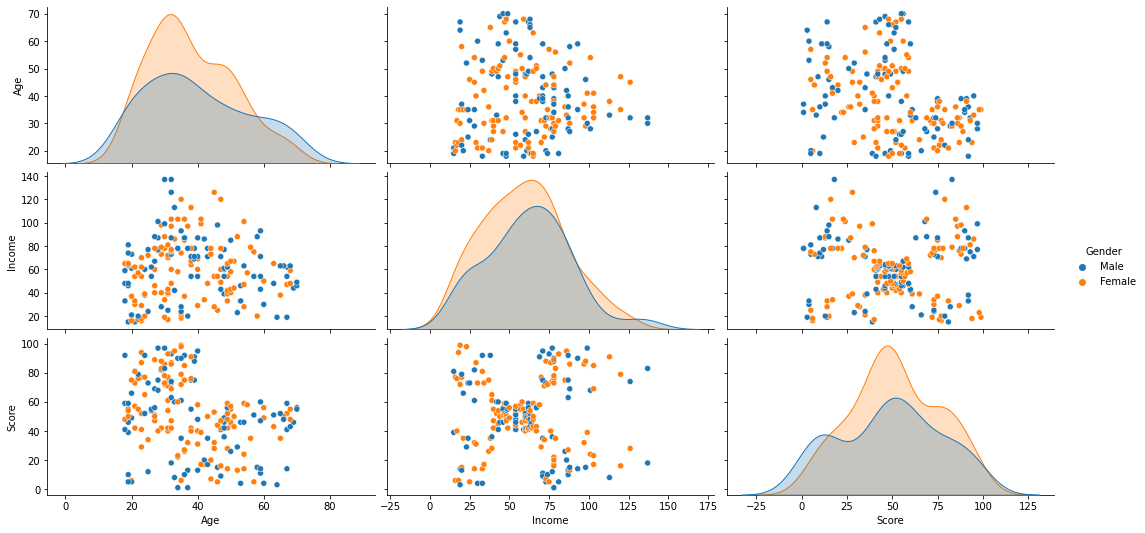

In [6]:
x_data = data.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=2.0)
plt.show()

# **Feature Normalizing using MinMaxScaler**

In [7]:
# Normalization of Features with MinmaxScaler
from sklearn.preprocessing import MinMaxScaler

In [8]:
x_data

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [9]:
scaler = MinMaxScaler()

scaler.fit(x_data[['Age']])
x_data['Normalize_Age'] = scaler.transform(x_data[['Age']])

scaler.fit(x_data[['Income']])
x_data['Normalize_Income'] = scaler.transform(x_data[['Income']])

scaler.fit(x_data[['Score']])
x_data['Normalize_Score'] = scaler.transform(x_data[['Score']])

In [10]:
x_data.head()

,Age,Income,Score,Normalize_Age,Normalize_Income,Normalize_Score
0,19,15,39,0.019231,0.000000,0.387755
1,21,15,81,0.057692,0.000000,0.816327
2,20,16,6,0.038462,0.008197,0.051020
3,23,16,77,0.096154,0.008197,0.775510
4,31,17,40,0.250000,0.016393,0.397959


# **Graph after normalizing features**

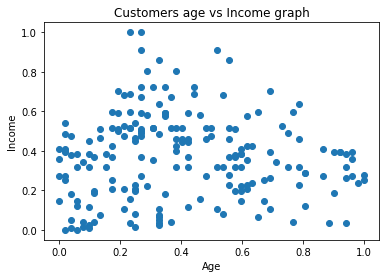

In [11]:
# Age vs Income graph
plt.scatter(x_data['Normalize_Age'],x_data['Normalize_Income'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Customers age vs Income graph")
plt.show()

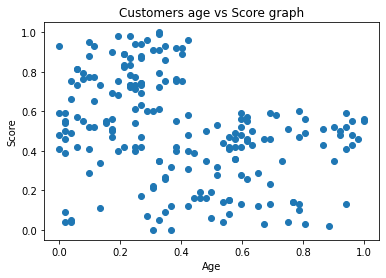

In [12]:
# Age vs Score graph
plt.scatter(x_data['Normalize_Age'],x_data['Normalize_Score'])
plt.xlabel("Age")
plt.ylabel("Score")
plt.title("Customers age vs Score graph")
plt.show()

# **Elbow Plot**

In [13]:
# Elbow Plot
WSS = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x_data[['Normalize_Age','Normalize_Income','Normalize_Score']])
    WSS.append(km.inertia_)

In [14]:
print(WSS)

[37.401482160359436,
 22.56077488260975,
 17.371946164404164,
 12.650287676229915,
 10.303964892534122,
 8.385099035848985,
 7.194627451966417,
 6.248886770318164,
 5.503779523863418,
 5.0131532467683835,
 4.66386761504997,
 4.2007215979704435,
 3.9186126315088905,
 3.7829112838475885]

#**Graph of k vs WSS**

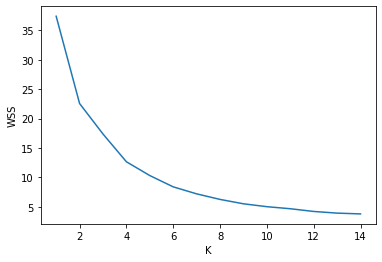

In [15]:
plt.xlabel('K')
plt.ylabel('WSS')
plt.plot(k_rng,WSS)

***Based On Elbow Method, we can conclude that k = 4. because line has sudden drop from 4.***


***Next step is to apply k mean clustering algorithm with k=4 that predict 4 different cluster***

In [16]:
# apply k mean clustering algorithm with k=4 that predict 4 different cluster
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(x_data[['Normalize_Income','Normalize_Score']])
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

# **silhouette_score**

In [17]:
from sklearn.metrics import silhouette_score 

In [18]:
# silhouette_score
score = silhouette_score(x_data[['Normalize_Income','Normalize_Score']],y_pred)
score

0.49620078745146784

In [25]:
x_data['cluster']=y_pred
x_data.head(10)

,Age,Income,Score,Normalize_Age,Normalize_Income,Normalize_Score,cluster
0,19,15,39,0.019231,0.000000,0.387755,3
1,21,15,81,0.057692,0.000000,0.816327,0
2,20,16,6,0.038462,0.008197,0.051020,3
3,23,16,77,0.096154,0.008197,0.775510,0
4,31,17,40,0.250000,0.016393,0.397959,3
5,22,17,76,0.076923,0.016393,0.765306,0
6,35,18,6,0.326923,0.024590,0.051020,3
7,23,18,94,0.096154,0.024590,0.948980,0
8,64,19,3,0.884615,0.032787,0.020408,3
9,30,19,72,0.230769,0.032787,0.724490,0


# **Cluset Centroid**

In [20]:
# Cluset Centroid
km.cluster_centers_

array([[0.27262295, 0.56612245],
       [0.59016393, 0.17991407],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432]])

# **Plot the output clusters with the optimal K**

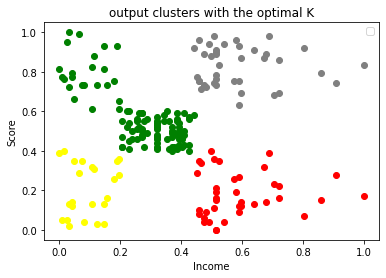

In [26]:
# Plot the output clusters with the optimal K

x_data1 = x_data[x_data.cluster==0]
x_data2 = x_data[x_data.cluster==1]
x_data3 = x_data[x_data.cluster==2]
x_data4 = x_data[x_data.cluster==3]

plt.scatter(x_data1.Normalize_Income,x_data1['Normalize_Score'],color='green')
plt.scatter(x_data2.Normalize_Income,x_data2['Normalize_Score'],color='red')
plt.scatter(x_data3.Normalize_Income,x_data3['Normalize_Score'],color='gray')
plt.scatter(x_data4.Normalize_Income,x_data4['Normalize_Score'],color='yellow')

plt.xlabel('Income')
plt.ylabel('Score')
plt.title("output clusters with the optimal K")
plt.legend()

# **Plot the centers of the clusters on the previous plot and show the centroids with a larger size**

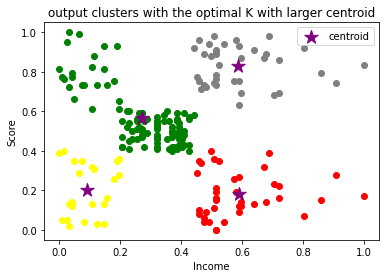

In [28]:
# Plot the centers of the clusters on the previous plot and show the centroids with a larger size

x_data1 = x_data[x_data.cluster==0]
x_data2 = x_data[x_data.cluster==1]
x_data3 = x_data[x_data.cluster==2]
x_data4 = x_data[x_data.cluster==3]

plt.scatter(x_data1.Normalize_Income,x_data1['Normalize_Score'],color='green')
plt.scatter(x_data2.Normalize_Income,x_data2['Normalize_Score'],color='red')
plt.scatter(x_data3.Normalize_Income,x_data3['Normalize_Score'],color='gray')
plt.scatter(x_data4.Normalize_Income,x_data4['Normalize_Score'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid',s=200)
plt.xlabel('Income')
plt.ylabel('Score')
plt.title("output clusters with the optimal K with larger centroid")
plt.legend()